In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
import seaborn as sns

In [ ]:
music=pd.read_csv("songs_normalize.csv")

In [ ]:
music

In [4]:
music.head(5) 

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [8]:
columns=["key","mode","valence","speechiness"] #I dropped thoose columns so dataset came to more readable

In [10]:
music.drop(columns,axis=1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,loudness,acousticness,instrumentalness,liveness,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,-5.444,0.3000,0.000018,0.3550,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,-4.918,0.0103,0.000000,0.6120,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,-9.007,0.1730,0.000000,0.2510,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,-4.063,0.0263,0.000013,0.3470,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,-4.806,0.0408,0.001040,0.0845,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,-5.065,0.0427,0.000000,0.1060,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,-5.707,0.1170,0.000021,0.1050,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,-8.635,0.0669,0.000000,0.2740,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,-7.513,0.4500,0.000002,0.2220,102.998,pop


In [13]:
music.shape[0] #How many rows are there in this dataset

2000

In [14]:
music.shape[1] #How many columns are there in this dataset

18

In [16]:
music["popularity"].mean() #get average popularity

59.8725

In [22]:
music[music["popularity"]==music["popularity"].max()]["artist"].iloc[0] #I found the biggest popularity

'The Neighbourhood'

In [23]:
music[music["popularity"]==music["popularity"].min()]["artist"].iloc[0]

'Oasis'

In [31]:
music.groupby("popularity").mean()

,duration_ms,explicit,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,,,,,,,,,,,,,,
0,217545.531746,0.261905,2012.793651,0.669175,0.732873,5.007937,-5.563357,0.587302,0.093918,0.118285,0.017535,0.167537,0.524407,121.049643
1,211200.967742,0.225806,2012.516129,0.637677,0.650516,5.290323,-5.765968,0.645161,0.112439,0.191205,0.011238,0.238016,0.566774,124.105323
2,224408.636364,0.090909,2010.000000,0.675273,0.681818,6.000000,-6.542727,0.636364,0.093391,0.140094,0.139586,0.111655,0.503273,107.312909
3,227877.000000,0.200000,2008.800000,0.670600,0.597400,5.000000,-6.220000,0.800000,0.076940,0.020982,0.089400,0.165880,0.490800,93.747600
4,225053.250000,0.500000,2013.000000,0.720000,0.483750,8.000000,-6.183000,0.750000,0.057275,0.255680,0.000001,0.168150,0.453500,119.037000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,240036.142857,0.142857,2013.000000,0.629857,0.687000,5.000000,-5.162143,1.000000,0.058729,0.085657,0.021634,0.180557,0.506571,126.503143
86,220272.500000,0.250000,2012.750000,0.603750,0.489500,4.000000,-7.435250,0.000000,0.037900,0.483825,0.000005,0.082425,0.418000,109.018750
87,290320.000000,1.000000,2002.000000,0.908000,0.669000,7.000000,-2.827000,1.000000,0.073800,0.002860,0.000000,0.237000,0.662000,112.238000


In [32]:
music["genre"].value_counts()

pop                                      428
hip hop, pop                             277
hip hop, pop, R&B                        244
pop, Dance/Electronic                    221
pop, R&B                                 178
hip hop                                  124
hip hop, pop, Dance/Electronic            78
rock                                      58
rock, pop                                 43
Dance/Electronic                          41
rock, metal                               38
pop, latin                                28
pop, rock                                 26
set()                                     22
hip hop, Dance/Electronic                 16
latin                                     15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
country                                   10
metal                                      9
hip hop, p

In [33]:
music.year.unique() #Checking years of release present in the dataset

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014], dtype=int64)

In [37]:
popular = music.groupby('artist')[['artist','popularity']].sum().sort_values('popularity',
                                                               ascending=False).head(10)
popular

,popularity
artist,
Rihanna,1803
Eminem,1519
Drake,1424
Calvin Harris,1356
Britney Spears,1198
David Guetta,1185
Taylor Swift,1125
Chris Brown,1080
Kanye West,1049


In [6]:
music.groupby("popularity").mean()

,duration_ms,explicit,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,,,,,,,,,,,,,,
0,217545.531746,0.261905,2012.793651,0.669175,0.732873,5.007937,-5.563357,0.587302,0.093918,0.118285,0.017535,0.167537,0.524407,121.049643
1,211200.967742,0.225806,2012.516129,0.637677,0.650516,5.290323,-5.765968,0.645161,0.112439,0.191205,0.011238,0.238016,0.566774,124.105323
2,224408.636364,0.090909,2010.000000,0.675273,0.681818,6.000000,-6.542727,0.636364,0.093391,0.140094,0.139586,0.111655,0.503273,107.312909
3,227877.000000,0.200000,2008.800000,0.670600,0.597400,5.000000,-6.220000,0.800000,0.076940,0.020982,0.089400,0.165880,0.490800,93.747600
4,225053.250000,0.500000,2013.000000,0.720000,0.483750,8.000000,-6.183000,0.750000,0.057275,0.255680,0.000001,0.168150,0.453500,119.037000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,240036.142857,0.142857,2013.000000,0.629857,0.687000,5.000000,-5.162143,1.000000,0.058729,0.085657,0.021634,0.180557,0.506571,126.503143
86,220272.500000,0.250000,2012.750000,0.603750,0.489500,4.000000,-7.435250,0.000000,0.037900,0.483825,0.000005,0.082425,0.418000,109.018750
87,290320.000000,1.000000,2002.000000,0.908000,0.669000,7.000000,-2.827000,1.000000,0.073800,0.002860,0.000000,0.237000,0.662000,112.238000


In [31]:
music1=music.sort_values("popularity",ascending=False)

In [32]:
music1

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,Olly Murs,Up (feat. Demi Lovato),224293,False,2014,0,0.690,0.845,9,-4.676,1,0.0339,0.01930,0.000000,0.1010,0.638,114.948,"pop, Dance/Electronic"
1447,Ariana Grande,Break Free,214840,False,2014,0,0.687,0.702,7,-5.324,0,0.0455,0.00640,0.000044,0.2040,0.284,129.956,pop
1439,The Chainsmokers,#SELFIE - Original Mix,183750,False,2014,0,0.789,0.915,0,-3.263,1,0.2480,0.01350,0.000009,0.0818,0.660,127.955,"pop, Dance/Electronic"
1794,Shawn Mendes,Mercy,208733,False,2017,0,0.561,0.674,4,-4.882,0,0.0818,0.11800,0.000000,0.1110,0.383,148.127,pop


(array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

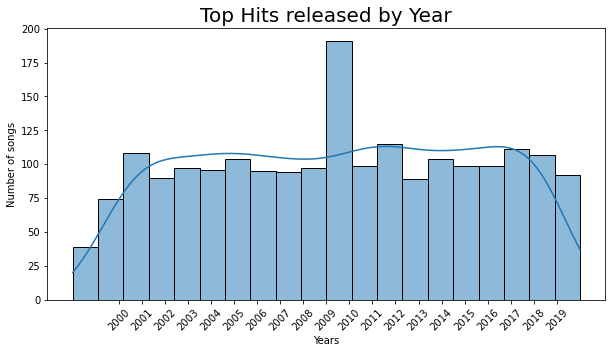

In [37]:
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.histplot(x="year", data=music, kde=True, bins=20)
ax.set_title("Top Hits released by Year", fontsize=20)
ax.set_ylabel("Number of songs")
ax.set_xlabel("Years")
ax.set_xticks(range(2000, 2020, 1)) #Show all years
plt.xticks(rotation=45) #Avoid overlapping years